In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# read data
df = pd.read_csv('analytics_20191001_20201001.csv', skiprows=6).dropna()
# remove commas from number strings
df['Users'] = df['Users'].apply(lambda x: x.replace(',', ''))
df['Ecommerce Conversion Rate'] = (df['Ecommerce Conversion Rate'].apply(lambda x: x.replace('%', '')))
# convert users column to integer
df['Users'] = df['Users'].astype(int)
df['Ecommerce Conversion Rate'] = (df['Ecommerce Conversion Rate'].astype(float)) / 100
df.head()

,Default Channel Grouping,Date,Date Range,Segment,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,Organic Search,20191202,"Oct 1, 2019 - Jan 1, 2020",All Users,1828,"1,463","1,973",54.79%,3.47,0:02:23,0.0015,3.0,$73.80
1,Organic Search,20191202,"Oct 1, 2019 - Jan 1, 2020",Made a Purchase,3,3,3,0.00%,14.33,0:05:43,1.0000,3.0,$73.80
2,Organic Search,20191202,"Oct 1, 2019 - Jan 1, 2020",Tablet and Desktop Traffic,1345,"1,052","1,457",54.84%,3.59,0:02:38,0.0014,2.0,$32.00
3,Organic Search,20191202,"Oct 1, 2019 - Jan 1, 2020",Add to Cart,47,27,48,0.00%,15.40,0:12:43,0.0000,0.0,$0.00
4,Organic Search,20191129,"Oct 1, 2019 - Jan 1, 2020",All Users,1814,"1,527","1,889",56.48%,3.07,0:01:46,0.0016,3.0,$139.00


In [46]:
df_all = df[df['Segment'] == 'All Users']
df_all.head()

,Default Channel Grouping,Date,Date Range,Segment,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,Organic Search,20191202,"Oct 1, 2019 - Jan 1, 2020",All Users,1828,"1,463","1,973",54.79%,3.47,0:02:23,0.0015,3.0,$73.80
4,Organic Search,20191129,"Oct 1, 2019 - Jan 1, 2020",All Users,1814,"1,527","1,889",56.48%,3.07,0:01:46,0.0016,3.0,$139.00
8,Organic Search,20191126,"Oct 1, 2019 - Jan 1, 2020",All Users,1688,"1,322","1,881",53.96%,3.52,0:02:30,0.0011,2.0,$38.20
12,Organic Search,20191113,"Oct 1, 2019 - Jan 1, 2020",All Users,1664,"1,349","1,871",58.04%,3.29,0:02:22,0.0011,2.0,$33.00
16,Organic Search,20191203,"Oct 1, 2019 - Jan 1, 2020",All Users,1644,"1,315","1,756",56.55%,3.14,0:02:12,0.0028,5.0,$154.60


In [47]:
df_cart = df[df['Segment'] == 'Add to Cart']
df_cart.head()

,Default Channel Grouping,Date,Date Range,Segment,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
3,Organic Search,20191202,"Oct 1, 2019 - Jan 1, 2020",Add to Cart,47,27,48,0.00%,15.40,0:12:43,0.0000,0.0,$0.00
7,Organic Search,20191129,"Oct 1, 2019 - Jan 1, 2020",Add to Cart,36,18,36,0.00%,21.89,0:16:09,0.0000,0.0,$0.00
11,Organic Search,20191126,"Oct 1, 2019 - Jan 1, 2020",Add to Cart,57,29,62,0.00%,17.11,0:14:02,0.0161,1.0,$24.00
15,Organic Search,20191113,"Oct 1, 2019 - Jan 1, 2020",Add to Cart,40,22,41,0.00%,17.78,0:15:53,0.0488,2.0,$33.00
19,Organic Search,20191203,"Oct 1, 2019 - Jan 1, 2020",Add to Cart,43,28,44,0.00%,15.45,0:09:54,0.0682,3.0,$108.60


Plotting distributions of all users and users that used their shopping cart:

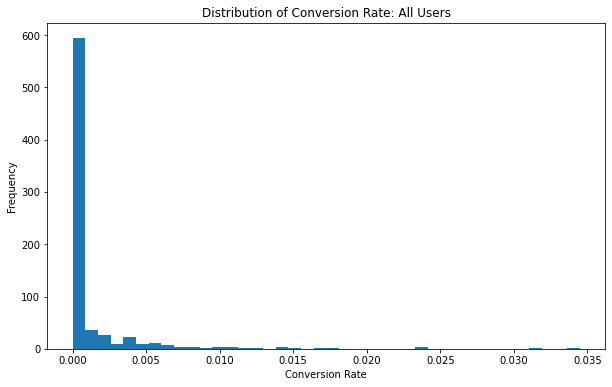

In [55]:
# plot histogram of all users
plt.figure(figsize=(10,6))
plt.hist(df_all['Ecommerce Conversion Rate'], bins=40)
plt.title('Distribution of Conversion Rate: All Users')
vals = np.arange(0, 0.035, step=0.005)
plt.xticks(vals)
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.show()

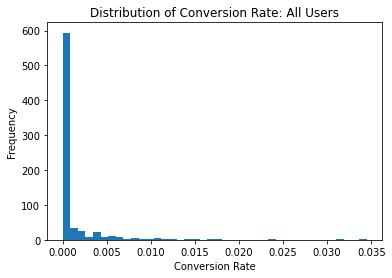

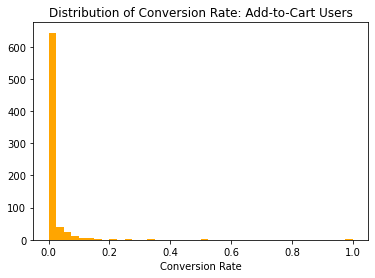

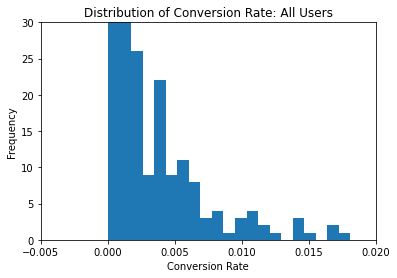

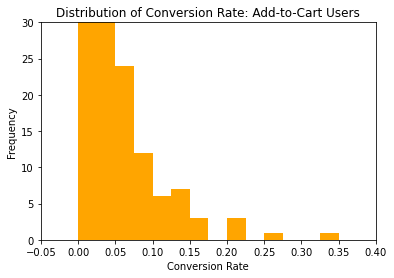

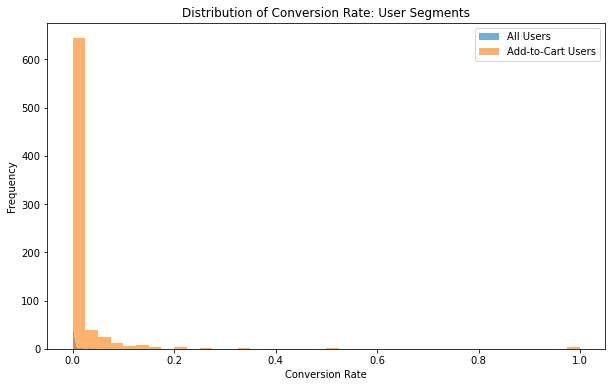

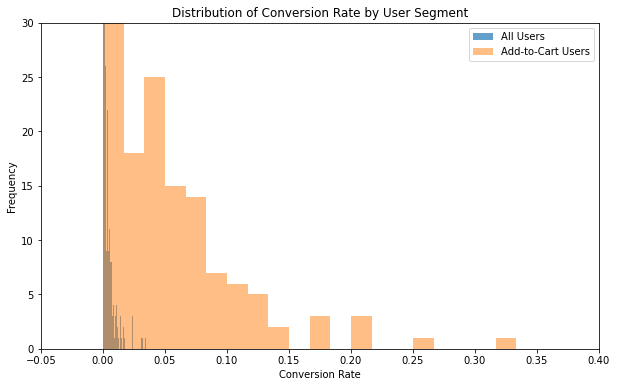

In [76]:
# plot histogram of all users
plt.hist(df_all['Ecommerce Conversion Rate'], bins=40)
plt.title('Distribution of Conversion Rate: All Users')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.show()

# plot histogram of all users that added products to cart
plt.hist(df_cart['Ecommerce Conversion Rate'], bins=40, color='orange')
plt.title('Distribution of Conversion Rate: Add-to-Cart Users')
plt.xlabel('Conversion Rate')
plt.show()

# set axis limits to get a closer look at the distributions

# plot histogram of all users
plt.hist(df_all['Ecommerce Conversion Rate'], bins=40)
plt.title('Distribution of Conversion Rate: All Users')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.xlim(-0.005, 0.02)
plt.ylim(0, 30)
plt.show()

# plot histogram of all users that added products to cart
plt.hist(df_cart['Ecommerce Conversion Rate'], bins=40, color='orange')
plt.title('Distribution of Conversion Rate: Add-to-Cart Users')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.xlim(-0.05, 0.4)
plt.ylim(0, 30)
plt.show()

# overlay distributions

plt.figure(figsize=(10,6))
plt.hist(df_all['Ecommerce Conversion Rate'], bins=40, alpha=0.6, label='All Users')
plt.hist(df_cart['Ecommerce Conversion Rate'], bins=40, alpha=0.6, label='Add-to-Cart Users')
plt.legend()
plt.title('Distribution of Conversion Rate: User Segments')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.show()

# overlay with axis limits

plt.figure(figsize=(10,6))
plt.hist(df_all['Ecommerce Conversion Rate'], bins=40, alpha=0.7, label='All Users')
plt.hist(df_cart['Ecommerce Conversion Rate'], bins=60, alpha=0.5, label='Add-to-Cart Users')
plt.xlim(-0.05, 0.4)
plt.ylim(0, 30)
plt.legend()
plt.title('Distribution of Conversion Rate by User Segment')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.show()